In [2]:
"""
Exercise 5: Complete PyTorch Workflow
PyTorch Workflow Fundamentals - Module 2

This exercise covers:
- Putting together the complete workflow
- Device-agnostic code
- Hyperparameter experimentation
- Training from scratch to deployment
- Comparing experiments

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""


'\nExercise 5: Complete PyTorch Workflow\nPyTorch Workflow Fundamentals - Module 2\n\nThis exercise covers:\n- Putting together the complete workflow\n- Device-agnostic code\n- Hyperparameter experimentation\n- Training from scratch to deployment\n- Comparing experiments\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [3]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Set random seed for reproducibility
torch.manual_seed(42)


In [4]:

# ============================================
# Part 1: Complete Workflow Function
# ============================================

print("=" * 60)
print("Part 1: Complete Workflow Function")
print("=" * 60)



Part 1: Complete Workflow Function


In [5]:

def train_linear_regression(
    weight=0.7,
    bias=0.3,
    train_ratio=0.7,
    val_ratio=0.15,
    learning_rate=0.01,
    epochs=100,
    device='cpu',
    save_model=False,
    model_name='linear_model'
):
    """
    Complete workflow for linear regression
    """
    print(f"\nTraining with lr={learning_rate}, epochs={epochs}")
    print("-" * 60)

    # 1. Prepare data
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
    y = weight * X + bias

    train_split = int(train_ratio * len(X))
    val_split = int((train_ratio + val_ratio) * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test, y_test = X[val_split:], y[val_split:]

    # 2. Build model


    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # 3. Train
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

    # 4. Evaluate
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test).item()

    print(f"Final - Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Test Loss: {test_loss:.4f}")
    print(f"Learned - weight: {model.weight.item():.4f} (true: {weight}), "
          f"bias: {model.bias.item():.4f} (true: {bias})")

    # 5. Save
    results = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'test_loss': test_loss,
        'final_weight': model.weight.item(),
        'final_bias': model.bias.item()
    }

    if save_model:
        os.makedirs('saved_models', exist_ok=True)
        save_path = f'saved_models/{model_name}_lr{learning_rate}_e{epochs}.pth'
        torch.save(model.state_dict(), save_path)
        print(f"Model saved to: {save_path}")
        results['save_path'] = save_path

    return results


# TODO: Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [6]:

# ============================================
# Part 2: Running a Single Experiment
# ============================================

print("\n" + "=" * 60)
print("Part 2: Running a Single Experiment")
print("=" * 60)



Part 2: Running a Single Experiment


In [7]:

results = train_linear_regression(
    learning_rate=0.01,
    epochs=100,
    device=device,
    save_model=True,
    model_name='experiment_1'
)



Training with lr=0.01, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0036, Val Loss: 0.0189, Test Loss: 0.0311
Learned - weight: 0.4398 (true: 0.7), bias: 0.3607 (true: 0.3)
Model saved to: saved_models/experiment_1_lr0.01_e100.pth


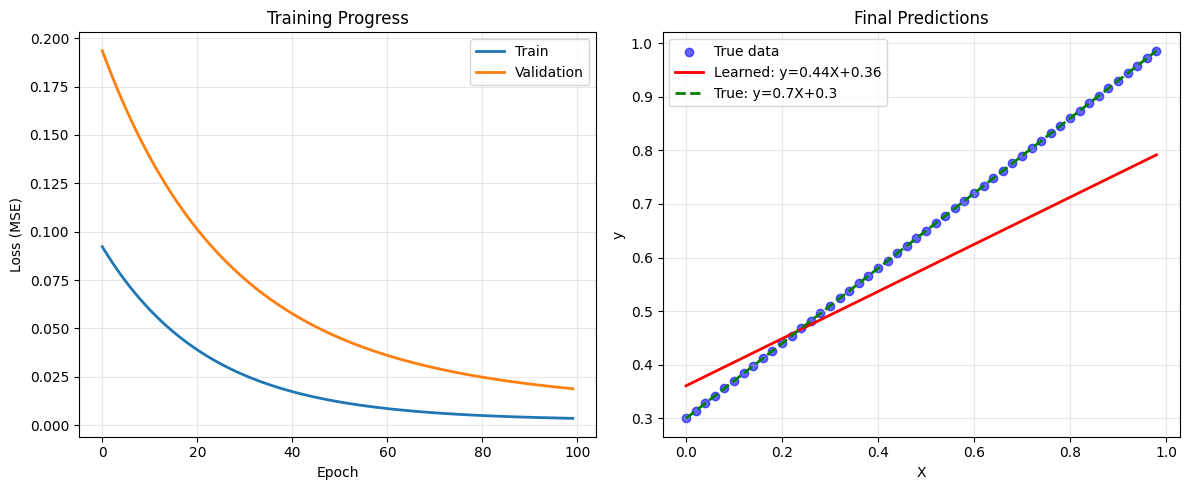

In [8]:

# TODO: Visualize results
plt.figure(figsize=(12, 5))

# Training curve
plt.subplot(1, 2, 1)
plt.plot(results['train_losses'], label='Train', linewidth=2)
plt.plot(results['val_losses'], label='Validation', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)

# Final predictions
plt.subplot(1, 2, 2)
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
y_true = 0.7 * X + 0.3
with torch.no_grad():
    y_pred = results['model'](X)

plt.scatter(X.cpu(), y_true.cpu(), c='b', alpha=0.6, label='True data')
plt.plot(X.cpu(), y_pred.cpu(), 'r-', linewidth=2,
         label=f"Learned: y={results['final_weight']:.2f}X+{results['final_bias']:.2f}")
plt.plot(X.cpu(), 0.7 * X.cpu() + 0.3, 'g--', linewidth=2, label='True: y=0.7X+0.3')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Final Predictions')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:

# ============================================
# Part 3: Hyperparameter Experiments
# ============================================

print("\n" + "=" * 60)
print("Part 3: Hyperparameter Experiments")
print("=" * 60)



Part 3: Hyperparameter Experiments


In [10]:

# TODO: Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1]
all_results = {}

for lr in learning_rates:
    print(f"\n{'='*60}")
    print(f"Experiment with learning_rate={lr}")
    print(f"{'='*60}")
    results = train_linear_regression(
        learning_rate=lr,
        epochs=100,
        device=device
    )
    all_results[lr] = results



Experiment with learning_rate=0.001

Training with lr=0.001, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0412, Val Loss: 0.1367, Test Loss: 0.1910
Learned - weight: 0.2521 (true: 0.7), bias: 0.2711 (true: 0.3)

Experiment with learning_rate=0.01

Training with lr=0.01, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0908, Val Loss: 0.4766, Test Loss: 0.8112
Learned - weight: -0.7020 (true: 0.7), bias: 0.6775 (true: 0.3)

Experiment with learning_rate=0.1

Training with lr=0.1, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0258, Val Loss: 0.1037, Test Loss: 0.1937
Learned - weight: 1.4872 (true: 0.7), bias: 0.0222 (true: 0.3)


In [11]:

# ============================================
# Part 4: Comparing Experiments
# ============================================

print("\n" + "=" * 60)
print("Part 4: Comparing Experiments")
print("=" * 60)



Part 4: Comparing Experiments


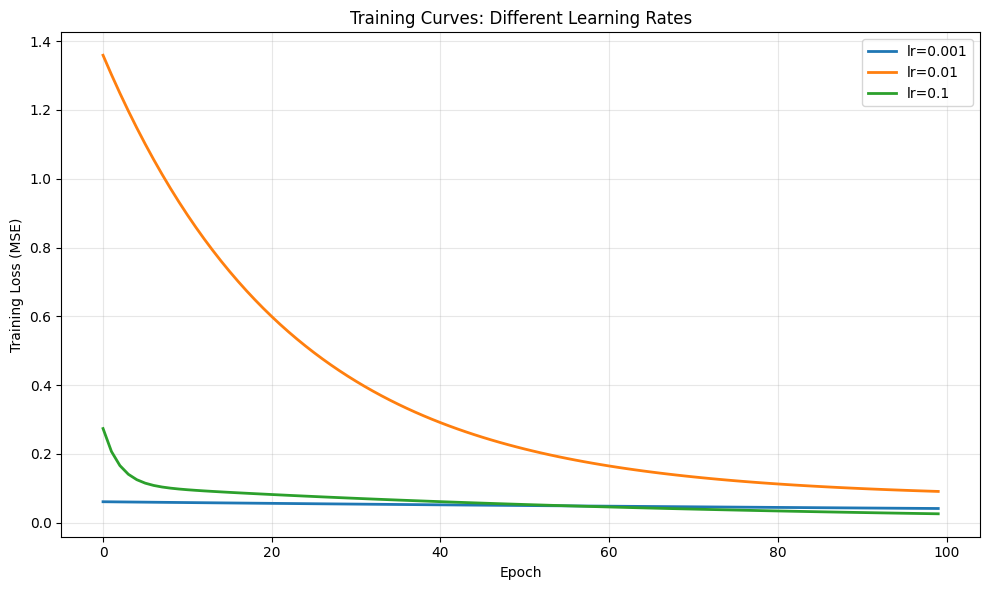

In [12]:

# TODO: Compare training curves
plt.figure(figsize=(10, 6))
for lr, results in all_results.items():
    plt.plot(results['train_losses'], label=f'lr={lr}', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.legend()
plt.title('Training Curves: Different Learning Rates')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:

# TODO: Compare final results
print(f"\nFinal Results Comparison:")
print(f"{'LR':<10} {'Test Loss':<12} {'Weight':<10} {'Bias':<10}")
print("-" * 45)
for lr, results in all_results.items():
    print(f"{lr:<10.3f} {results['test_loss']:<12.4f} "
          f"{results['final_weight']:<10.4f} {results['final_bias']:<10.4f}")



Final Results Comparison:
LR         Test Loss    Weight     Bias      
---------------------------------------------
0.001      0.1910       0.2521     0.2711    
0.010      0.8112       -0.7020    0.6775    
0.100      0.1937       1.4872     0.0222    


In [14]:

# ============================================
# Part 5: Making Predictions with Loaded Models
# ============================================

print("\n" + "=" * 60)
print("Part 5: Making Predictions with Loaded Models")
print("=" * 60)




Part 5: Making Predictions with Loaded Models


In [15]:

# TODO: Load the best model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


# Load
loaded_model = LinearRegressionModel().to(device)
loaded_model.load_state_dict(torch.load('saved_models/experiment_1_lr0.01_e100.pth'))
loaded_model.eval()

print("Model loaded successfully!")


Model loaded successfully!


In [16]:

# TODO: Make predictions on new data
new_data = torch.tensor([[0.25], [0.5], [0.75]]).to(device)
with torch.no_grad():
    predictions = loaded_model(new_data)

print(f"\nPredictions for new data:")
for i, x in enumerate(new_data):
    print(f"  X={x.item():.2f} -> y={predictions[i].item():.4f}")



Predictions for new data:
  X=0.25 -> y=0.4707
  X=0.50 -> y=0.5806
  X=0.75 -> y=0.6906


In [17]:

# ============================================
# Part 6: Complete Summary
# ============================================

print("\n" + "=" * 60)
print("Part 6: Complete Summary")
print("=" * 60)



Part 6: Complete Summary


In [18]:

print(f"\nWorkflow Complete!")
print(f"{'='*60}")
print(f"Summary:")
print(f"  - Trained {len(all_results)} models with different learning rates")
print(f"  - Best test loss: {min(r['test_loss'] for r in all_results.values()):.4f}")
print(f"  - Models saved to: saved_models/")
print(f"  - Device used: {device}")
print(f"\nKey Takeaways:")
print(f"  - Learning rate significantly affects convergence")
print(f"  - Too small: slow learning")
print(f"  - Too large: instability")
print(f"  - Just right: fast, stable convergence")



Workflow Complete!
Summary:
  - Trained 3 models with different learning rates
  - Best test loss: 0.1910
  - Models saved to: saved_models/
  - Device used: cpu

Key Takeaways:
  - Learning rate significantly affects convergence
  - Too small: slow learning
  - Too large: instability
  - Just right: fast, stable convergence


In [19]:

# ============================================
# Exercises
# ============================================

print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)



Exercises



Exercise 1: Vary number of epochs
Tip: Look for when val loss starts increasing

Experiment with 50 epochs

Training with lr=0.1, epochs=50
------------------------------------------------------------
Final - Train Loss: 0.0019, Val Loss: 0.0076, Test Loss: 0.0141
Learned - weight: 0.4873 (true: 0.7), bias: 0.3751 (true: 0.3)

Experiment with 100 epochs

Training with lr=0.1, epochs=100
------------------------------------------------------------
Final - Train Loss: 0.0094, Val Loss: 0.0379, Test Loss: 0.0708
Learned - weight: 1.1761 (true: 0.7), bias: 0.1320 (true: 0.3)

Experiment with 200 epochs

Training with lr=0.1, epochs=200
------------------------------------------------------------
Final - Train Loss: 0.0065, Val Loss: 0.0262, Test Loss: 0.0489
Learned - weight: 0.3042 (true: 0.7), bias: 0.4396 (true: 0.3)

Experiment with 500 epochs

Training with lr=0.1, epochs=500
------------------------------------------------------------
Final - Train Loss: 0.0000, Val Loss: 0.0000, Te

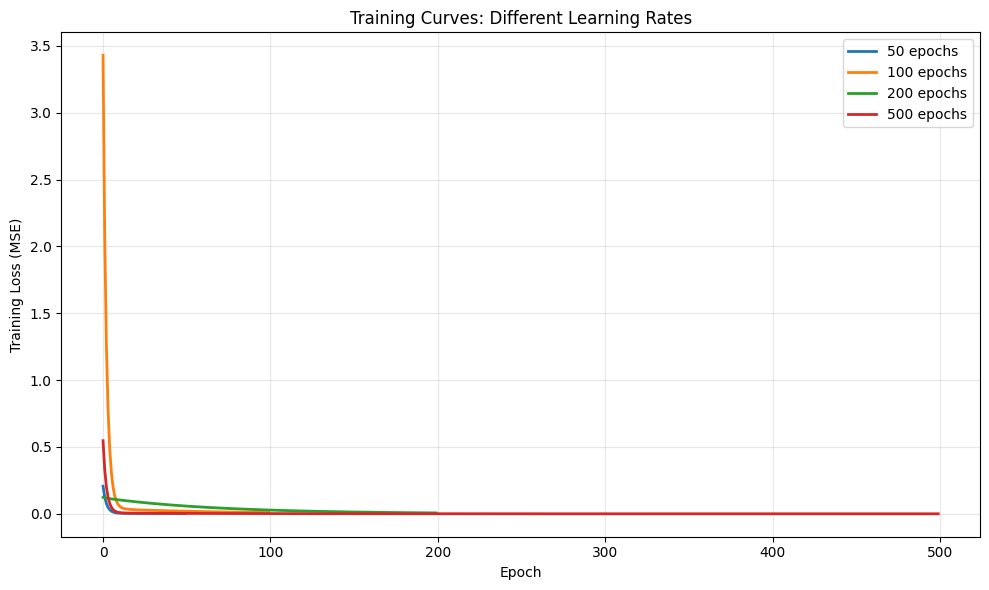

From epochs 100


In [ ]:

# Exercise 1: Epoch experiments
print("\nExercise 1: Vary number of epochs")
print("Tip: Look for when val loss starts increasing")
# TODO: Train with 50, 100, 200, 500 epochs
array = [50, 100, 200, 500]
all_results = {}

for num_epochs in array:
    print(f"\n{'='*60}")
    print(f"Experiment with {num_epochs} epochs")
    print(f"{'='*60}")
    results = train_linear_regression(
        learning_rate=0.1,
        epochs=num_epochs,
        device=device
    )
    all_results[num_epochs] = results

# TODO: Compare results
plt.figure(figsize=(10, 6))
for num_epochs, results in all_results.items():
    plt.plot(results['train_losses'], label=f'{num_epochs} epochs', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.legend()
plt.title('Training Curves: Different Number of Epochs')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# TODO: Identify when overfitting occurs
print("From epochs 100")


In [36]:
# re-define the function
def train_linear_regression(
    opt_function=lambda params: optim.SGD(params, lr=0.01), # optimizer function to fit exercise 2
    X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device),
    weight=0.7,
    bias=0.3,
    train_ratio=0.7,
    val_ratio=0.15,
    # learning_rate=0.01,
    noise=False, # noise to fit exercise 3
    epochs=100,
    device='cpu',
    save_model=False,
    model_name='linear_model'
):
    """
    Complete workflow for linear regression
    """
    # print(f"\nTraining with lr={learning_rate}, epochs={epochs}")
    print("-" * 60)

    # 1. Prepare data
    
    # X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)
    y = weight * X + bias

    train_split = int(train_ratio * len(X))
    val_split = int((train_ratio + val_ratio) * len(X))

    X_train, y_train = X[:train_split], y[:train_split]
    X_val, y_val = X[train_split:val_split], y[train_split:val_split]
    X_test, y_test = X[val_split:], y[val_split:]

    # TODO: Add Gaussian noise to training data
    if noise:
        y_train = y_train + torch.randn_like(y_train) * 0.1

    # 2. Build model

    class LinearRegressionModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(1))
            self.bias = nn.Parameter(torch.randn(1))

        def forward(self, x):
            return self.weight * x + self.bias

    model = LinearRegressionModel().to(device)
    criterion = nn.MSELoss()
    # opt_function(params)
    optimizer = opt_function(model.parameters())

    # 3. Train
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

    # 4. Evaluate
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test).item()

    print(f"Final - Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, Test Loss: {test_loss:.4f}")
    print(f"Learned - weight: {model.weight.item():.4f} (true: {weight}), "
          f"bias: {model.bias.item():.4f} (true: {bias})")

    # 5. Save
    results = {
        'model': model,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'test_loss': test_loss,
        'final_weight': model.weight.item(),
        'final_bias': model.bias.item()
    }

    if save_model:
        os.makedirs('saved_models', exist_ok=True)
        save_path = f'saved_models/{model_name}_lr{learning_rate}_e{epochs}.pth'
        torch.save(model.state_dict(), save_path)
        print(f"Model saved to: {save_path}")
        results['save_path'] = save_path

    return results


# TODO: Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu



Exercise 2: Compare SGD vs Adam
Tip: optim.Adam(model.parameters(), lr=0.01)

Experiment with SGD Optimizer
------------------------------------------------------------
Final - Train Loss: 0.0304, Val Loss: 0.1624, Test Loss: 0.2707
Learned - weight: 0.3080 (true: 0.7), bias: 0.4962 (true: 0.3)

Experiment with Adam Optimizer
------------------------------------------------------------
Final - Train Loss: 0.0029, Val Loss: 0.0079, Test Loss: 0.0160
Learned - weight: 0.8256 (true: 0.7), bias: 0.1968 (true: 0.3)


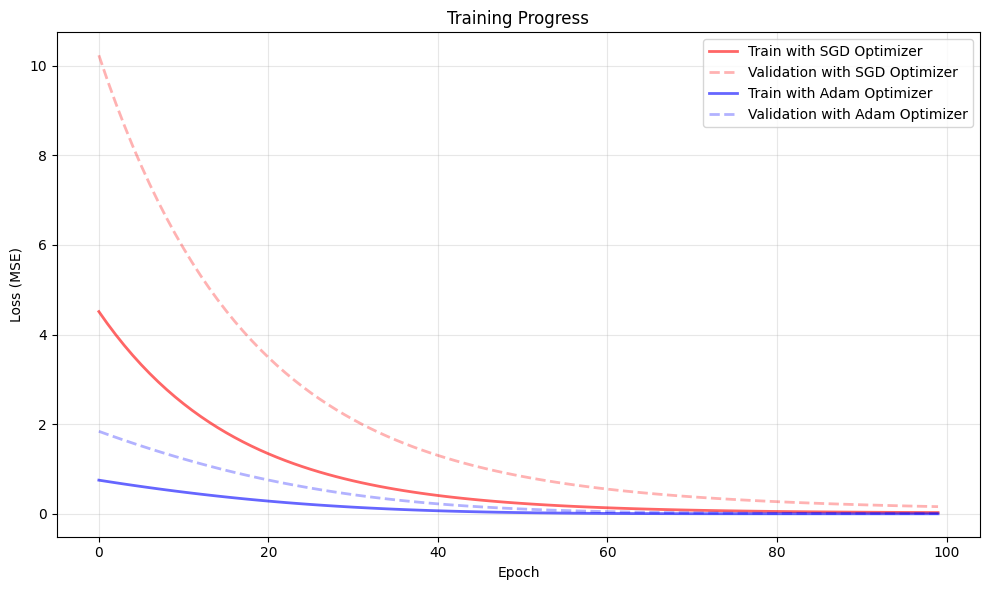

In [22]:
# Exercise 2: Optimizer comparison
print("\nExercise 2: Compare SGD vs Adam")
print("Tip: optim.Adam(model.parameters(), lr=0.01)")
# TODO: Train with SGD and Adam
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.01),
    "Adam": lambda params: optim.Adam(params, lr=0.01)
}
all_results = {}

for opt_name, opt_func in optimizers.items():
    print(f"\n{'='*60}")
    print(f"Experiment with {opt_name} Optimizer")
    print(f"{'='*60}")
    results = train_linear_regression(
        device=device,
        opt_function=opt_func
    )
    all_results[opt_name] = results
# TODO: Compare convergence speed
# TODO: Compare final results

plt.figure(figsize=(10, 6))
colors = {
    "SGD": "r",
    "Adam": "b"
}
for opt_name, results in all_results.items():
    plt.plot(results['train_losses'], c=colors[opt_name], label=f'Train with {opt_name} Optimizer', linewidth=2, alpha=0.6)
    plt.plot(results['val_losses'], c=colors[opt_name], linestyle='--', label=f'Validation with {opt_name} Optimizer', linewidth=2, alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Exercise 3: Add noise to data
Tip: y_noisy = y + torch.randn_like(y) * 0.1
------------------------------------------------------------
Final - Train Loss: 0.1183, Val Loss: 0.4769, Test Loss: 0.8931
Learned - weight: 1.5518 (true: 0.7), bias: -0.3122 (true: 0.3)
------------------------------------------------------------
Final - Train Loss: 0.0502, Val Loss: 0.2149, Test Loss: 0.3953
Learned - weight: 0.1473 (true: 0.7), bias: 0.6818 (true: 0.3)


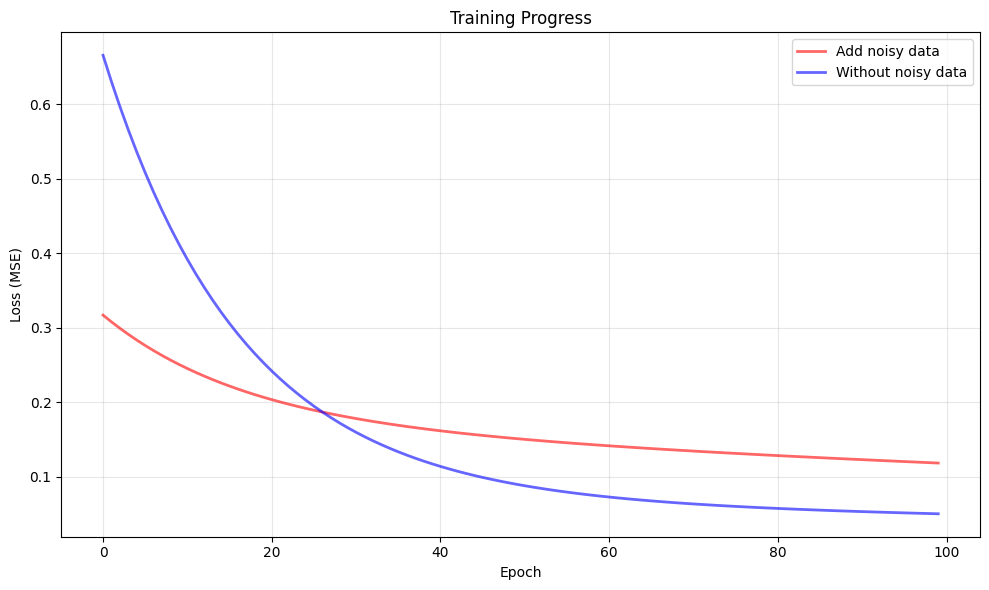

In [23]:

# Exercise 3: Noise robustness
print("\nExercise 3: Add noise to data")
print("Tip: y_noisy = y + torch.randn_like(y) * 0.1")
# TODO: Add Gaussian noise to training data
# TODO: Train model on noisy data
results_noisy_data = train_linear_regression(noise=True)
results = train_linear_regression()
# TODO: Compare with clean data results

plt.figure(figsize=(10, 6))
plt.plot(results_noisy_data['train_losses'], c='r', label=f'Add noisy data', linewidth=2, alpha=0.6)
plt.plot(results['train_losses'], c='b', label=f'Without noisy data', linewidth=2, alpha=0.6)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Exercise 4: Different data ranges
Tip: Modify torch.arange() to change range

Experiment with [0, 2] data
------------------------------------------------------------
Final - Train Loss: 0.0299, Val Loss: 0.1555, Test Loss: 0.2675
Learned - weight: 0.2892 (true: 0.7), bias: 0.5399 (true: 0.3)

Experiment with [0, 10] data
------------------------------------------------------------
Final - Train Loss: 0.0016, Val Loss: 0.0030, Test Loss: 0.0064
Learned - weight: 0.7172 (true: 0.7), bias: 0.2214 (true: 0.3)

Experiment with negative data
------------------------------------------------------------
Final - Train Loss: 0.0015, Val Loss: 0.0020, Test Loss: 0.0028
Learned - weight: 0.6386 (true: 0.7), bias: 0.2642 (true: 0.3)


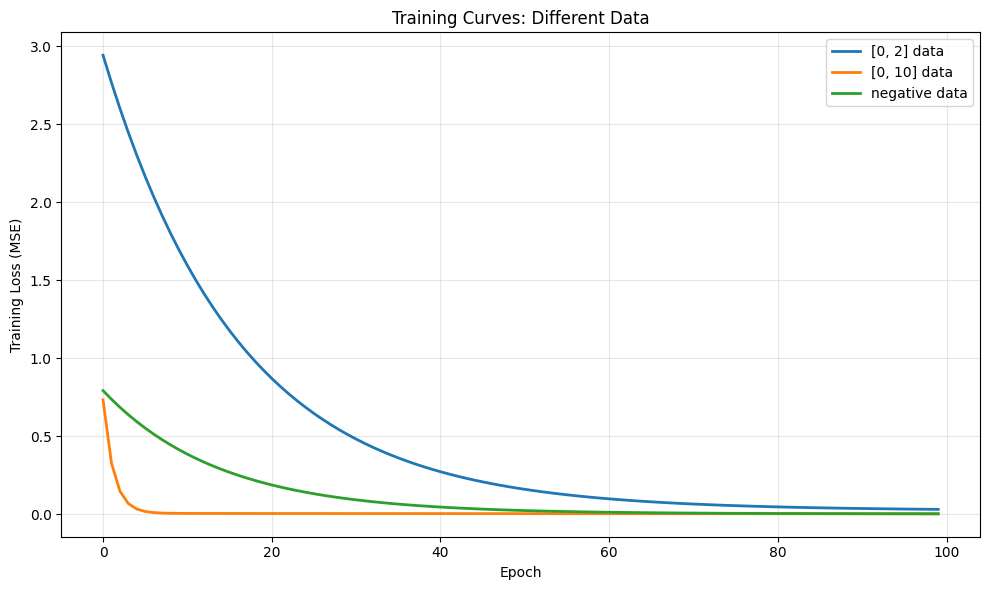

In [58]:

# Exercise 4: Different data ranges
print("\nExercise 4: Different data ranges")
print("Tip: Modify torch.arange() to change range")

# TODO: Try X in range [0, 2], [0, 10]
# TODO: Try negative values
# TODO: Analyze effect on training

# create data
X_0_2 = torch.arange(0, 2, 0.02).unsqueeze(dim=1)
X_0_10 = torch.arange(0, 10, 0.1).unsqueeze(dim=1)
random = torch.randn(100)
mask = random < 0
X_negative = random[mask].unsqueeze(dim=1)

array_X = {
    '[0, 2]': X_0_2,
    '[0, 10]': X_0_10,
    'negative': X_negative
}

all_results = {}

for name, X in array_X.items():
    print(f"\n{'='*60}")
    print(f"Experiment with {name} data")
    print(f"{'='*60}")
    results = train_linear_regression(
        X=X
    )
    all_results[name] = results

plt.figure(figsize=(10, 6))
for name, results in all_results.items():
    plt.plot(results['train_losses'], label=f'{name} data', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.legend()
plt.title('Training Curves: Different Data')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [78]:

# Exercise 5: Complete experiments
print("\nExercise 5: Design your own experiment")
print("Tip: What happens if you change the weight and bias?")

# TODO: Come up with a hypothesis
# TODO: Design experiment to test it
# TODO: Run and analyze results
# TODO: Document findings

customX = torch.randn(50).unsqueeze(dim=1).to(device)
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1).to(device)

results_custom = train_linear_regression(
    opt_function=lambda params: optim.Adam(params, lr=0.01),
    X=customX,
    weight=-0.9,
    bias=0.2,
    noise=True,
)
results = train_linear_regression(
    weight=-0.9,
    bias=0.2,
)

print(results['model'])


Exercise 5: Design your own experiment
Tip: What happens if you change the weight and bias?
------------------------------------------------------------
Final - Train Loss: 0.0151, Val Loss: 0.0030, Test Loss: 0.0029
Learned - weight: -0.8931 (true: -0.9), bias: 0.1442 (true: 0.2)
------------------------------------------------------------
Final - Train Loss: 0.0032, Val Loss: 0.0036, Test Loss: 0.0087
Learned - weight: -1.1219 (true: -0.9), bias: 0.3091 (true: 0.2)
LinearRegressionModel()


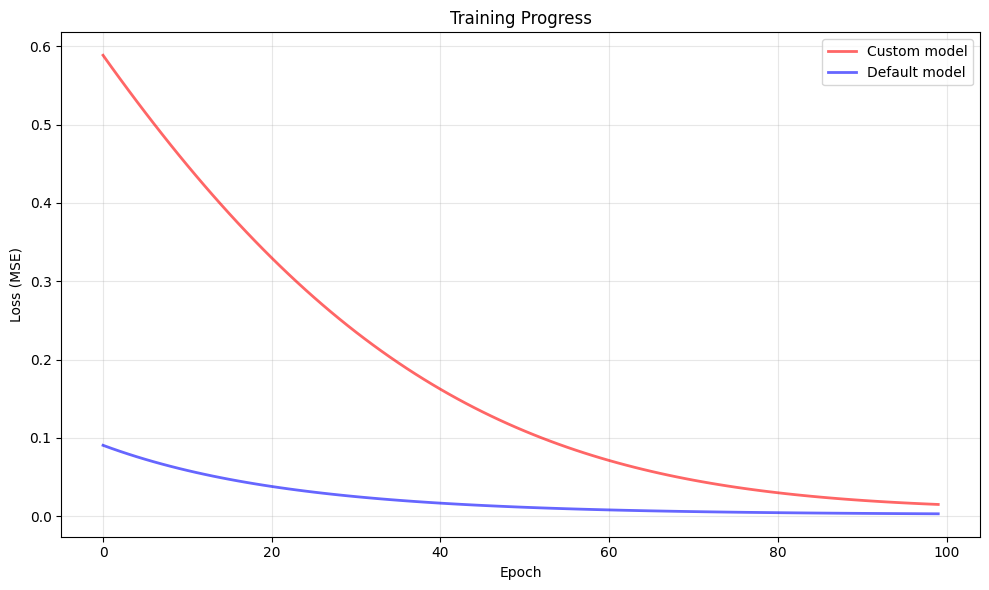

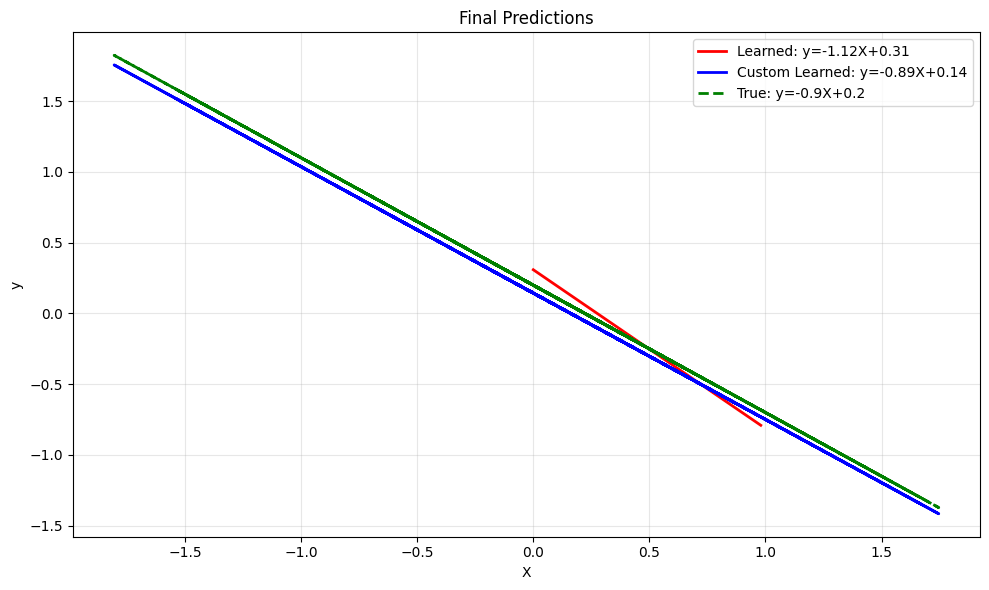

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(results_custom['train_losses'], c='r', label='Custom model', linewidth=2, alpha=0.6)
plt.plot(results['train_losses'], c='b', label='Default model', linewidth=2, alpha=0.6)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

y_true = -0.9 * X + 0.2
y_true_custom = -0.9 * customX + 0.2
with torch.no_grad():
    y_pred = results['model'](X)
    y_pred_custom = results_custom['model'](customX)

# plt.scatter(X.cpu(), y_true.cpu(), c='r', alpha=0.6, label='True data')

plt.plot(X.cpu(), y_pred.cpu(), 'r-', linewidth=2,
         label=f"Learned: y={results['final_weight']:.2f}X+{results['final_bias']:.2f}")

# plt.scatter(customX.cpu(), y_true_custom.cpu(), c='b', alpha=0.6, label='True custom data')

plt.plot(customX.cpu(), y_pred_custom.cpu(), 'b-', linewidth=2,
         label=f"Custom Learned: y={results_custom['final_weight']:.2f}X+{results_custom['final_bias']:.2f}")

plt.plot(customX.cpu(), -0.9 * customX + 0.2, 'g--', linewidth=2, label='True: y=-0.9X+0.2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Final Predictions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [81]:

print("\n" + "=" * 60)
print("Exercise 5 Complete!")
print("Remember: The three mottos apply to everything!")
print("  - If in doubt, run the code!")
print("  - Experiment, experiment, experiment!")
print("  - Visualize, visualize, visualize!")
print("=" * 60)


Exercise 5 Complete!
Remember: The three mottos apply to everything!
  - If in doubt, run the code!
  - Experiment, experiment, experiment!
  - Visualize, visualize, visualize!
